# Business Analytics & Data Science Intern at Sparks #GRIPJUN21
## Task 1 - Prediction Using Supervised ML Algo 
## By - Neel Patel

# Regression with Gradient discent Algorithm
In this section we will see Gradient discent algo for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables and then we will move towards linear regression involving multiple variables.

# Python Scikit Learn
Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN.

Importing Usefull Libraries for the task

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import *

#  #Process1   Data Preprocessing             - ML Pipeline

### Import the dataset

In [2]:
df = pd.read_csv("task_data/task1.csv")
print("Data Loaded Sucessfully")

Data Loaded Sucessfully


Let's do overview of Data

In [3]:
df.head(8)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60


### Check if there is any null values

In [4]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Let obeserve metadata of the dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Observe the 5 points statistical summary of the Dataset

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#  #Process2   Data Visualization             - ML Pipeline

Let's Visualize the Relationship between this feature and Vector

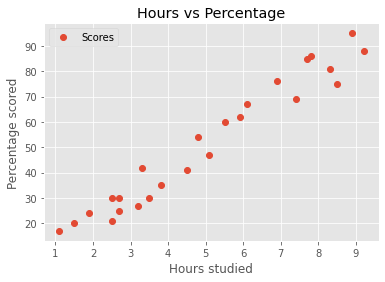

In [7]:
plt.style.use('ggplot')
df.plot(x="Hours", y="Scores", style="o")
plt.title("Hours vs Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentage scored")
plt.show()

#### Here we seen that there is a positive linear relationship between this two variables

#  #Process3   Feature Engineering             - ML Pipeline

In [8]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values
Y = Y.reshape(len(Y),1)


Now Lets split dataset for train & test to our model

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("The Train & Test Dataset been created successfully !!!")

The Train & Test Dataset been created successfully !!!


#  #Process4   Model Training             - ML Pipeline

## Lets train our Gradient-Discent-Liner-Regression Model

9.842770022580288 1.5514990279049512 15.395754963759632
The coeffecient =  9.842770022580288
The intercept =  1.5514990279049512
The Final Cost of Model =  15.395754963759632


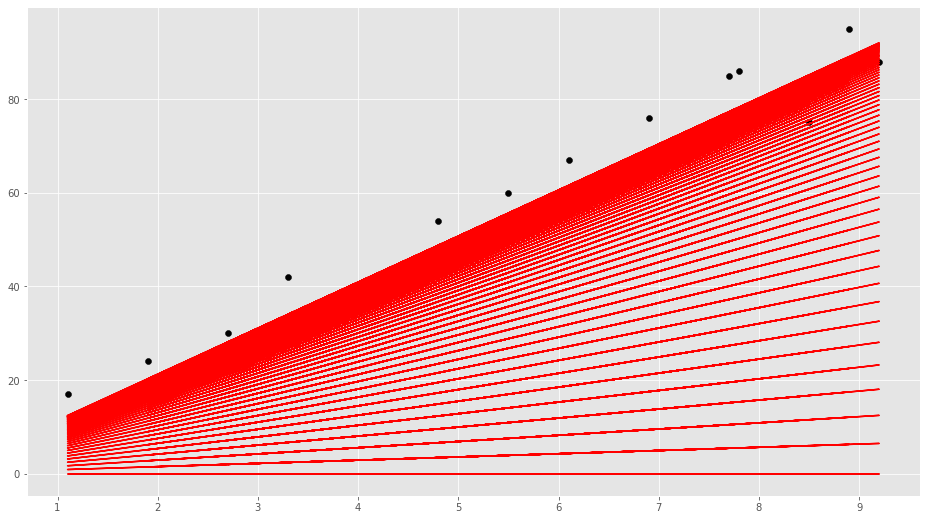

In [10]:
alpha = 0.001 #Learning Rate
itr = 60

plt.figure(figsize=(16,9))
# *****************************************************Model algorithm ********************************************************
def grad_descent(X,Y,itr,L):
    m = c = 0
    n = float(len(X))
    plt.scatter(X,Y,color="black")
    for i in range(itr):
        
        
        yp = m*X + c
        
        # gradient_decsent
        plt.plot(X,yp,color="red")           
        D_m = (-2/n) * sum((Y-yp) * X)
        D_c = (-2/n) * sum(Y-yp)
    
        m = m - L*D_m
        c = c - L*D_c
    
        j = (1/n)*sum(Y-yp)**2 # cost/loss fuction
    print(m,c,j)
    print("The coeffecient = ",m)
    print("The intercept = ",c)
    print("The Final Cost of Model = ", j)
    return m,c

# *****************************************************Model algorithm ********************************************************    

m,c = grad_descent(x_train,y_train,itr,alpha) 

## Making Prediction of test dataset by this gradient model

In [11]:
def predict_val(X,m,c):
    r = size(X)
    for i in range(r):
        y_pred = m*X + c
    return y_pred
result = predict_val(x_test,m,c)

## Let's compare the actual Data with the Predicted Data:

In [12]:
Main_Result = pd.DataFrame({"Actual Data": y_test.reshape(5,),
                       "Predicted Data": result.reshape(5,)})
print(Main_Result)

   Actual Data  Predicted Data
0           20       16.315654
1           27       33.048363
2           69       74.387997
3           30       26.158424
4           62       59.623842


#  #Process5   Prediction          - ML Pipeline

## Let's do test of our model by fitting new value
What will be predicted score if a student studies for 9.5 hrs/ day? 

In [15]:
hr = 9.5
sample_pred = predict_val(hr,m,c)
print("Number of hours = ",hr)
print("Predicted Score = ",sample_pred,"%")

Number of hours =  9.5
Predicted Score =  95.05781424241769 %


#  #Process6   Model Evaluation             - ML Pipeline


## Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

In [19]:
from sklearn import metrics
err = np.sqrt(metrics.mean_squared_error(y_test,result))
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,result))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,result))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test,result)))
print("Model Accuracy", 100-err,"%")

Mean Absolute Error:  4.267687997580249
Mean Squared Error:  19.918289309623653
Root Mean Squared Error:  4.462991072097686
Model Accuracy 95.53700892790232 %


# Thank You